In [1]:
import os, inspect, sys
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import datetime as dt
from dateutil.relativedelta import relativedelta

import plotly.plotly as py
import plotly.graph_objs as go


CURRENT_DIR = os.path.dirname(inspect.getabsfile(inspect.currentframe()))
ROOT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.insert(0, ROOT_DIR)

from reb.src.pyts import series_to_supervised

Using TensorFlow backend.


In [2]:
# monthly date range generator
def month_range(start_date, n_months):
    for m in range(n_months):
        yield start_date + relativedelta(months=+m)
        
# get all combinations of input iterable x
def get_combinations(x):
    rval = []
    for L in range(1, len(x)+1):
        for subset in itertools.combinations(x, L):
            rval.append(list(subset))
            
    return rval      

In [3]:
# read data
ffname = os.path.join(ROOT_DIR, "reb", "data", "ext", "data_monthly_processed.csv")
df_original = pd.read_csv(ffname, parse_dates=["DATE"])
df_original.DATE = pd.to_datetime(df_original.DATE, format="%Y-%m")
df_original.head()

# Make a clean copy of data
df = df_original.copy() 

# Reindex data frame per the time stamps
df.set_index("DATE", inplace=True)
df.head()

,PAYEMS,AWHNONAG,CES9091000001,USGOVT,UNEMPLOY,LNS13023706,MVPHGFD027MNFRBDAL,MNFCTRIRSA,MORTGAGE30US,MORTGAGE15US,DGS10,INDPRO,CMRMTSPL,W875RX1
DATE,,,,,,,,,,,,,,
1992-01-01,108374,34.1,3137,18688,9283,11.9,2719.3,1.66,8.4,8.0,7.0,63.3372,757479.217,6840.9
1992-02-01,108317,34.1,3121,18689,9454,9.8,2738.8,1.65,8.8,8.4,7.3,63.7864,759384.431,6879.1
1992-03-01,108369,34.1,3121,18715,9460,9.5,2760.5,1.58,8.9,8.6,7.5,64.3199,762440.896,6884.7
1992-04-01,108526,34.3,3117,18739,9415,10.4,2764.0,1.57,8.9,8.5,7.5,64.8069,767521.889,6903.6
1992-05-01,108653,34.3,3119,18753,9744,10.3,2830.7,1.55,8.7,8.3,7.4,65.0202,760844.122,6941.7


In [5]:
# Rescale data
all_values = df.values.astype("float32")
scaler = MinMaxScaler(feature_range=(0, 1))
all_values_scaled = scaler.fit_transform(all_values)

# USRECM: NBER based Recession Indicators for the United States from the Peak through the Trough
# index_target = NA

# GDPC1: Real Gross Domestic Product
# index_target = NA

# W875RX1: Real personal income excluding current transfer receipts
# index_target = 13

# PAYEMS: All Employees: Total Nonfarm Payrolls
index_target = 0

# INDPRO: Industrial Production Index
# index_target = 11

# CMRMTSPL: Real Manufacturing and Trade Industries Sales
# index_target = 12

variable_label = df.columns[index_target]
features = list(range(all_values_scaled.shape[1]))
del features[index_target]
feature_combinations = get_combinations(features)
features

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

model: f.1.t.0.h5
Train Inputs Shape: (255, 24)
Valid Inputs Shape: (53, 24)
Train Inputs Shape: (255, 12), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 12), Valid Targets Shape: (53, 6)
Train Inputs Shape: (255, 6, 2), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 6, 2), Valid Targets Shape: (53, 6)
Train on 255 samples, validate on 53 samples
Epoch 1/30
255/255 [==============================] - 1s 5ms/step - loss: 0.2873 - val_loss: 0.7034
Epoch 2/30
255/255 [==============================] - 0s 833us/step - loss: 0.2419 - val_loss: 0.6250
Epoch 3/30
255/255 [==============================] - 0s 770us/step - loss: 0.2038 - val_loss: 0.5526
Epoch 4/30
255/255 [==============================] - 0s 917us/step - loss: 0.1698 - val_loss: 0.4823
Epoch 5/30
255/255 [==============================] - 0s 893us/step - loss: 0.1378 - val_loss: 0.4107
Epoch 6/30
255/255 [==============================] - 0s 881us/step - loss: 0.1072 - val_loss: 0.3371
Epoch 7/30
255/255 [====

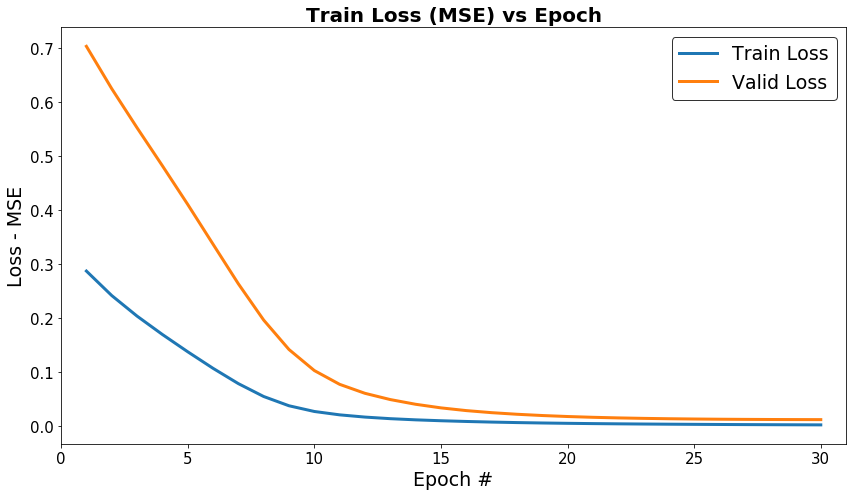

model: f.2.t.0.h5
Train Inputs Shape: (255, 24)
Valid Inputs Shape: (53, 24)
Train Inputs Shape: (255, 12), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 12), Valid Targets Shape: (53, 6)
Train Inputs Shape: (255, 6, 2), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 6, 2), Valid Targets Shape: (53, 6)
Train on 255 samples, validate on 53 samples
Epoch 1/30
255/255 [==============================] - 1s 4ms/step - loss: 0.2730 - val_loss: 0.6834
Epoch 2/30
255/255 [==============================] - 0s 881us/step - loss: 0.2335 - val_loss: 0.6048
Epoch 3/30
255/255 [==============================] - 0s 851us/step - loss: 0.1986 - val_loss: 0.5318
Epoch 4/30
255/255 [==============================] - 0s 891us/step - loss: 0.1666 - val_loss: 0.4611
Epoch 5/30
255/255 [==============================] - 0s 854us/step - loss: 0.1362 - val_loss: 0.3900
Epoch 6/30
255/255 [==============================] - 0s 935us/step - loss: 0.1070 - val_loss: 0.3183
Epoch 7/30
255/255 [====

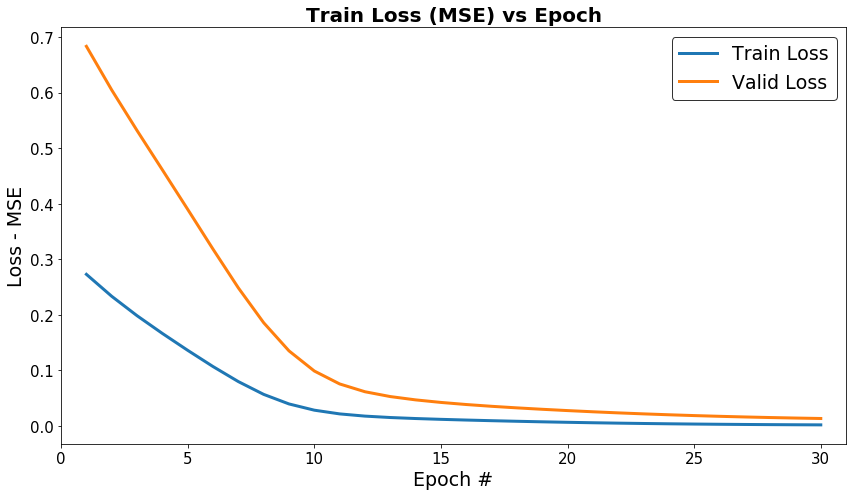

model: f.3.t.0.h5
Train Inputs Shape: (255, 24)
Valid Inputs Shape: (53, 24)
Train Inputs Shape: (255, 12), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 12), Valid Targets Shape: (53, 6)
Train Inputs Shape: (255, 6, 2), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 6, 2), Valid Targets Shape: (53, 6)
Train on 255 samples, validate on 53 samples
Epoch 1/30
255/255 [==============================] - 1s 4ms/step - loss: 0.2022 - val_loss: 0.4835
Epoch 2/30
255/255 [==============================] - 0s 868us/step - loss: 0.1497 - val_loss: 0.3737
Epoch 3/30
255/255 [==============================] - 0s 855us/step - loss: 0.1047 - val_loss: 0.2752
Epoch 4/30
255/255 [==============================] - 0s 868us/step - loss: 0.0702 - val_loss: 0.1958
Epoch 5/30
255/255 [==============================] - 0s 954us/step - loss: 0.0474 - val_loss: 0.1392
Epoch 6/30
255/255 [==============================] - 0s 908us/step - loss: 0.0330 - val_loss: 0.1023
Epoch 7/30
255/255 [====

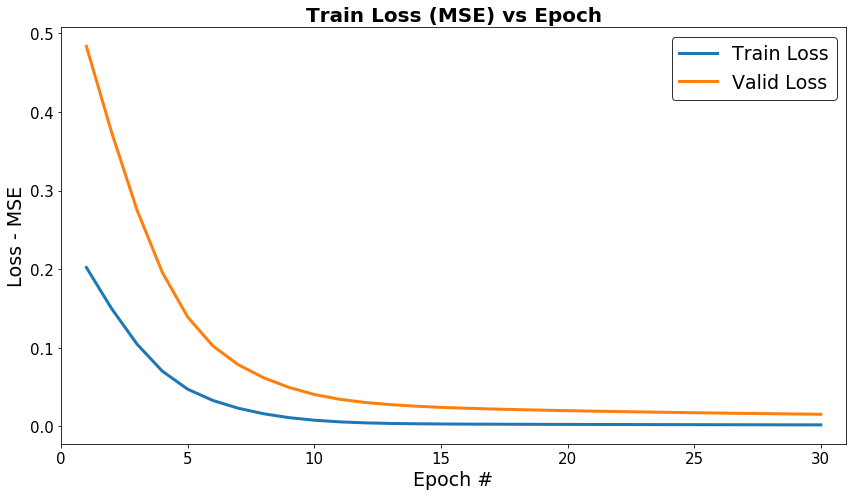

model: f.4.t.0.h5
Train Inputs Shape: (255, 24)
Valid Inputs Shape: (53, 24)
Train Inputs Shape: (255, 12), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 12), Valid Targets Shape: (53, 6)
Train Inputs Shape: (255, 6, 2), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 6, 2), Valid Targets Shape: (53, 6)
Train on 255 samples, validate on 53 samples
Epoch 1/30
255/255 [==============================] - 1s 4ms/step - loss: 0.2430 - val_loss: 0.5957
Epoch 2/30
255/255 [==============================] - 0s 826us/step - loss: 0.2042 - val_loss: 0.5173
Epoch 3/30
255/255 [==============================] - 0s 902us/step - loss: 0.1673 - val_loss: 0.4392
Epoch 4/30
255/255 [==============================] - 0s 916us/step - loss: 0.1314 - val_loss: 0.3596
Epoch 5/30
255/255 [==============================] - 0s 873us/step - loss: 0.0966 - val_loss: 0.2789
Epoch 6/30
255/255 [==============================] - 0s 904us/step - loss: 0.0649 - val_loss: 0.2018
Epoch 7/30
255/255 [====

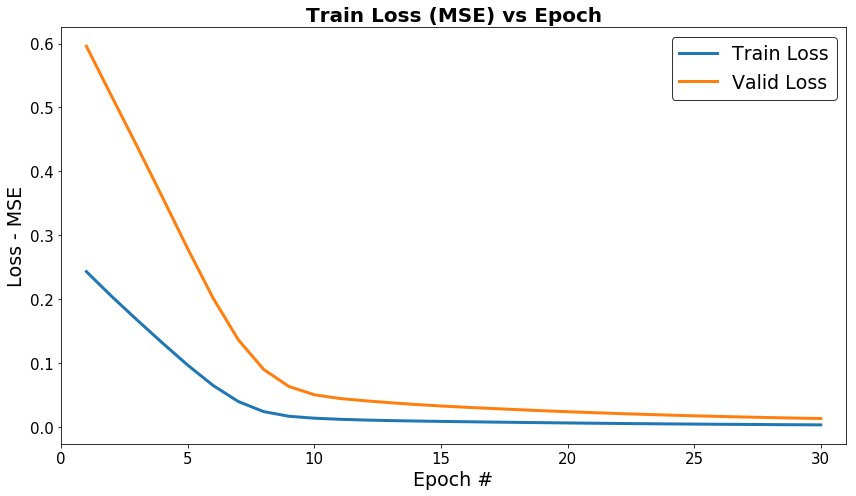

model: f.5.t.0.h5
Train Inputs Shape: (255, 24)
Valid Inputs Shape: (53, 24)
Train Inputs Shape: (255, 12), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 12), Valid Targets Shape: (53, 6)
Train Inputs Shape: (255, 6, 2), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 6, 2), Valid Targets Shape: (53, 6)
Train on 255 samples, validate on 53 samples
Epoch 1/30
255/255 [==============================] - 1s 4ms/step - loss: 0.2661 - val_loss: 0.6977
Epoch 2/30
255/255 [==============================] - 0s 875us/step - loss: 0.2169 - val_loss: 0.5984
Epoch 3/30
255/255 [==============================] - 0s 858us/step - loss: 0.1740 - val_loss: 0.5057
Epoch 4/30
255/255 [==============================] - 0s 922us/step - loss: 0.1357 - val_loss: 0.4168
Epoch 5/30
255/255 [==============================] - 0s 898us/step - loss: 0.1024 - val_loss: 0.3320
Epoch 6/30
255/255 [==============================] - 0s 912us/step - loss: 0.0755 - val_loss: 0.2560
Epoch 7/30
255/255 [====

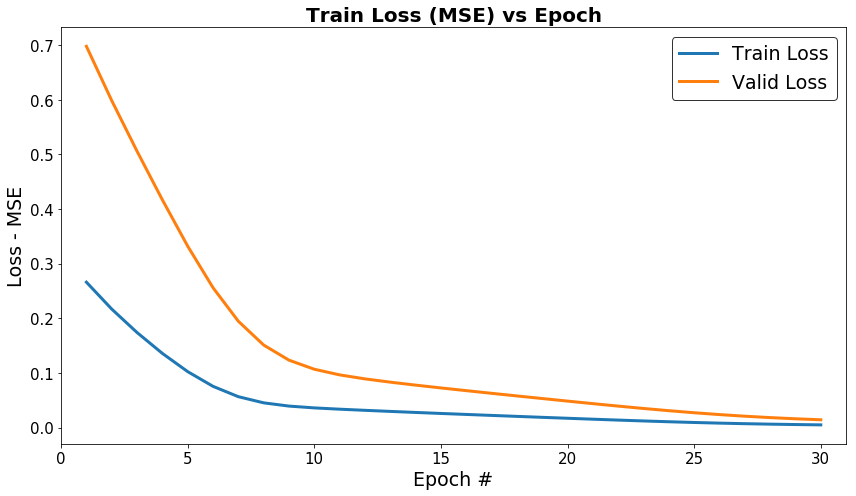

model: f.6.t.0.h5
Train Inputs Shape: (255, 24)
Valid Inputs Shape: (53, 24)
Train Inputs Shape: (255, 12), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 12), Valid Targets Shape: (53, 6)
Train Inputs Shape: (255, 6, 2), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 6, 2), Valid Targets Shape: (53, 6)
Train on 255 samples, validate on 53 samples
Epoch 1/30
255/255 [==============================] - 1s 5ms/step - loss: 0.2379 - val_loss: 0.6372
Epoch 2/30
255/255 [==============================] - 0s 840us/step - loss: 0.2028 - val_loss: 0.5539
Epoch 3/30
255/255 [==============================] - 0s 832us/step - loss: 0.1662 - val_loss: 0.4631
Epoch 4/30
255/255 [==============================] - 0s 897us/step - loss: 0.1284 - val_loss: 0.3648
Epoch 5/30
255/255 [==============================] - 0s 944us/step - loss: 0.0909 - val_loss: 0.2642
Epoch 6/30
255/255 [==============================] - 0s 877us/step - loss: 0.0579 - val_loss: 0.1740
Epoch 7/30
255/255 [====

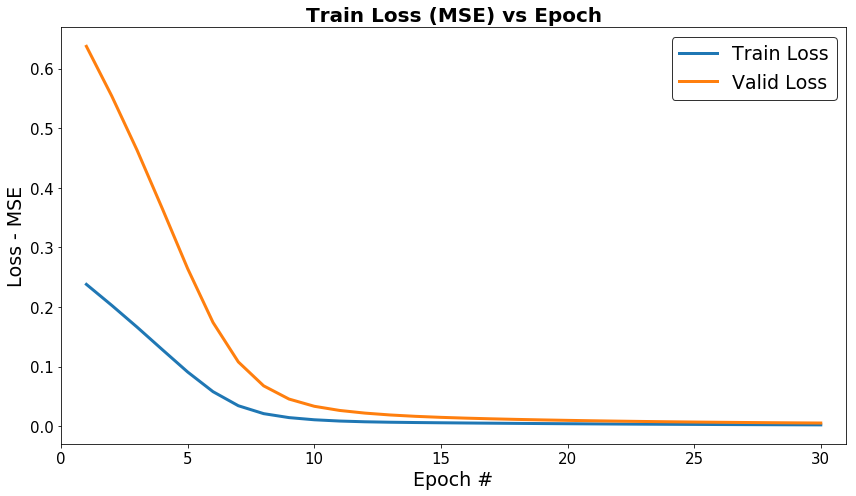

model: f.7.t.0.h5
Train Inputs Shape: (255, 24)
Valid Inputs Shape: (53, 24)
Train Inputs Shape: (255, 12), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 12), Valid Targets Shape: (53, 6)
Train Inputs Shape: (255, 6, 2), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 6, 2), Valid Targets Shape: (53, 6)
Train on 255 samples, validate on 53 samples
Epoch 1/30
255/255 [==============================] - 1s 5ms/step - loss: 0.1824 - val_loss: 0.4414
Epoch 2/30
255/255 [==============================] - 0s 867us/step - loss: 0.1421 - val_loss: 0.3482
Epoch 3/30
255/255 [==============================] - 0s 911us/step - loss: 0.1044 - val_loss: 0.2556
Epoch 4/30
255/255 [==============================] - 0s 887us/step - loss: 0.0715 - val_loss: 0.1700
Epoch 5/30
255/255 [==============================] - 0s 947us/step - loss: 0.0475 - val_loss: 0.1028
Epoch 6/30
255/255 [==============================] - 0s 995us/step - loss: 0.0351 - val_loss: 0.0617
Epoch 7/30
255/255 [====

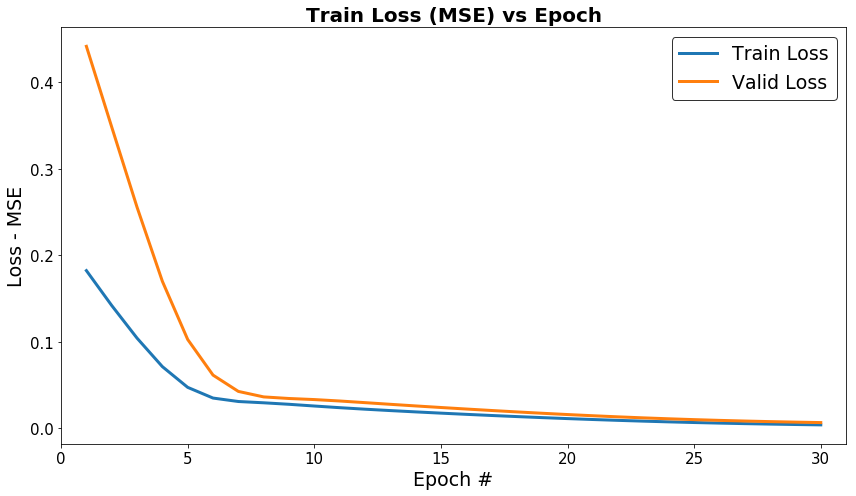

model: f.8.t.0.h5
Train Inputs Shape: (255, 24)
Valid Inputs Shape: (53, 24)
Train Inputs Shape: (255, 12), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 12), Valid Targets Shape: (53, 6)
Train Inputs Shape: (255, 6, 2), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 6, 2), Valid Targets Shape: (53, 6)
Train on 255 samples, validate on 53 samples
Epoch 1/30
255/255 [==============================] - 1s 5ms/step - loss: 0.3279 - val_loss: 0.7928
Epoch 2/30
255/255 [==============================] - 0s 782us/step - loss: 0.2728 - val_loss: 0.6927
Epoch 3/30
255/255 [==============================] - 0s 879us/step - loss: 0.2260 - val_loss: 0.6046
Epoch 4/30
255/255 [==============================] - 0s 930us/step - loss: 0.1849 - val_loss: 0.5237
Epoch 5/30
255/255 [==============================] - 0s 943us/step - loss: 0.1472 - val_loss: 0.4462
Epoch 6/30
255/255 [==============================] - 0s 990us/step - loss: 0.1124 - val_loss: 0.3700
Epoch 7/30
255/255 [====

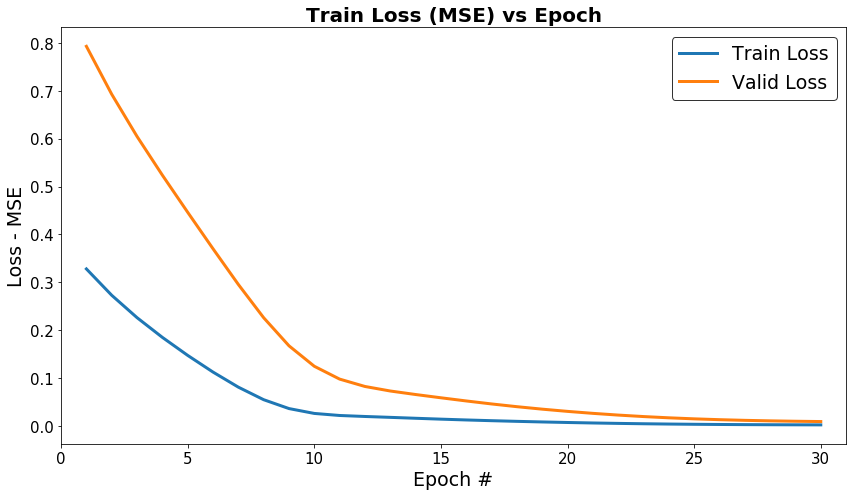

model: f.9.t.0.h5
Train Inputs Shape: (255, 24)
Valid Inputs Shape: (53, 24)
Train Inputs Shape: (255, 12), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 12), Valid Targets Shape: (53, 6)
Train Inputs Shape: (255, 6, 2), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 6, 2), Valid Targets Shape: (53, 6)
Train on 255 samples, validate on 53 samples
Epoch 1/30
255/255 [==============================] - 1s 5ms/step - loss: 0.1990 - val_loss: 0.5325
Epoch 2/30
255/255 [==============================] - 0s 847us/step - loss: 0.1648 - val_loss: 0.4598
Epoch 3/30
255/255 [==============================] - 0s 849us/step - loss: 0.1330 - val_loss: 0.3876
Epoch 4/30
255/255 [==============================] - 0s 928us/step - loss: 0.1039 - val_loss: 0.3185
Epoch 5/30
255/255 [==============================] - 0s 872us/step - loss: 0.0782 - val_loss: 0.2552
Epoch 6/30
255/255 [==============================] - 0s 885us/step - loss: 0.0563 - val_loss: 0.1998
Epoch 7/30
255/255 [====

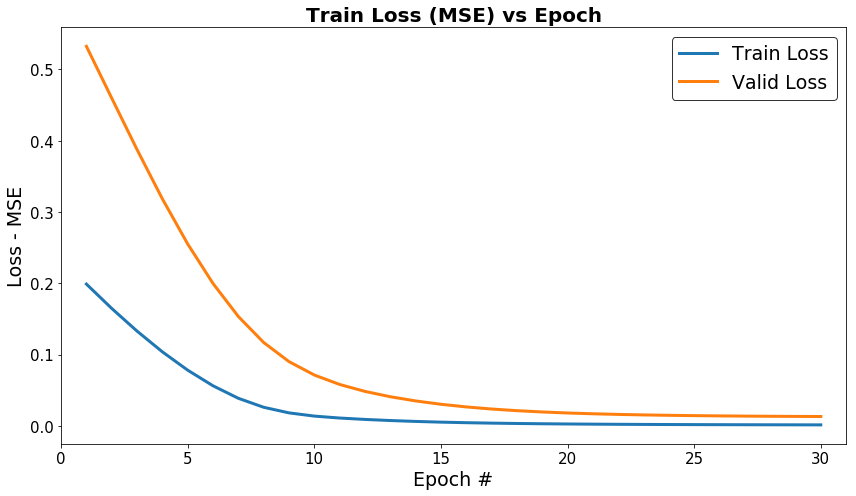

model: f.10.t.0.h5
Train Inputs Shape: (255, 24)
Valid Inputs Shape: (53, 24)
Train Inputs Shape: (255, 12), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 12), Valid Targets Shape: (53, 6)
Train Inputs Shape: (255, 6, 2), Train Targets Shape: (255, 6)
Valid Inputs Shape: (53, 6, 2), Valid Targets Shape: (53, 6)
Train on 255 samples, validate on 53 samples
Epoch 1/30
255/255 [==============================] - 1s 5ms/step - loss: 0.2676 - val_loss: 0.7144
Epoch 2/30
255/255 [==============================] - 0s 836us/step - loss: 0.2278 - val_loss: 0.6484
Epoch 3/30
255/255 [==============================] - 0s 812us/step - loss: 0.1917 - val_loss: 0.5820
Epoch 4/30
255/255 [==============================] - 0s 875us/step - loss: 0.1571 - val_loss: 0.5116
Epoch 5/30
255/255 [==============================] - 0s 946us/step - loss: 0.1229 - val_loss: 0.4355
Epoch 6/30
255/255 [==============================] - 0s 869us/step - loss: 0.0907 - val_loss: 0.3562
Epoch 7/30
255/255 [===

KeyboardInterrupt: 

In [5]:
for j in range(len(feature_combinations)):
# for j in range(5):
    comb = feature_combinations[j]
    fname = 'f.' +'.'.join([str(elem) for elem in comb]) + f'.t.{index_target}' + '.h5'
    print(f"model: {fname}")

    values_scaled = all_values_scaled[:, comb + [index_target]]
    n_variables = values_scaled.shape[1]
    # set model parameters
    n_lags = 6
    n_sequences = 6
    n_train = int(values_scaled.shape[0] * 0.8)
    n_units = 10

    # set train parameters
    optimizer = "adam"
    loss = "mse"
    n_epochs = 30
    sz_batch = 20
    verbose = 1

    df_reframed = series_to_supervised(values_scaled, n_lags, n_sequences)
    
    # [print(elem) for elem in df_reframed.columns]

    # create train/valid data
    # split into train and test sets
    values = df_reframed.values
    train_values, valid_values = values[:n_train, :], values[n_train:, :]
    print(f"Train Inputs Shape: {train_values.shape}")
    print(f"Valid Inputs Shape: {valid_values.shape}")
    
    # split into input and targets
    n_train, n_ = train_values.shape
    n_valid, n_ = valid_values.shape
    n_features = n_lags * n_variables
    
    x_train, y_train = train_values[:, :n_features], train_values[:, n_features+n_variables-1:n_:n_variables]
    x_valid, y_valid = valid_values[:, :n_features], valid_values[:, n_features+n_variables-1:n_:n_variables]
    print(f"Train Inputs Shape: {x_train.shape}, Train Targets Shape: {y_train.shape}")
    print(f"Valid Inputs Shape: {x_valid.shape}, Valid Targets Shape: {y_valid.shape}")
    
    # reshape data as required by ltsm
    x_train = x_train.reshape((n_train, n_lags, n_variables))
    x_valid = x_valid.reshape((n_valid, n_lags, n_variables))
    print(f"Train Inputs Shape: {x_train.shape}, Train Targets Shape: {y_train.shape}")
    print(f"Valid Inputs Shape: {x_valid.shape}, Valid Targets Shape: {y_valid.shape}")
    
    # build model
    model = Sequential()
    model.add(LSTM(n_units, input_shape=(n_lags, n_variables)))
    model.add(Dense(n_sequences))
    model.compile(loss=loss, optimizer=optimizer)

    # train model
    history = model.fit(x_train, y_train,
                        epochs=n_epochs,
                        batch_size=sz_batch,
                        validation_data=(x_valid, y_valid),
                        verbose=verbose,
                        shuffle=False)
   # Creates a HDF5 file 'my_model.h5'
    ffname = os.path.join(ROOT_DIR, "reb", "data", "int", fname)
    model.save(ffname)
    
    # plot history
    figsize = (12, 7)
    titlefontsize = 20
    xtickfontsize = 15
    ytickfontsize = 15
    labelfontsize = 19
    legendfontsize = 19
    linewidth = 3
    fig = plt.figure(figsize=figsize)
    ax = fig.subplots(1, 1)
    ax.plot(np.arange(1, n_epochs+1), history.history['loss'],
            "-",
            linewidth=linewidth,
            label='Train Loss')
    ax.plot(np.arange(1, n_epochs+1), history.history['val_loss'],
            "-",
            linewidth=linewidth,
            label='Valid Loss')
    ax.set_xlabel("Epoch #", fontsize=labelfontsize)
    ax.set_ylabel("Loss - " + loss.upper(), fontsize=labelfontsize)
    ax.tick_params(
        axis='x',          
        which='both',      
        labelsize=xtickfontsize)
    ax.tick_params(
        axis='y',    
        labelsize=ytickfontsize)
    ax.set_title("Train Loss " +  f"({loss})".upper() + " vs Epoch",
            fontsize=titlefontsize,
            fontweight="bold"
        )
    ax.legend(loc="upper right",
              fontsize=legendfontsize,
              framealpha=0.8,
              fancybox=True,
              frameon=True,
              shadow=False,
              edgecolor="k")
    ax.set_xlim([0, n_epochs+1])
    plt.tight_layout()
#     fname = f"loss-plot-valid.png"
    # fig.savefig(os.path.join(ROOT_DIR, "reports", "figures", fname), transparent=False, dpi=dpi)
    plt.show()
    del model

In [ ]:
comb